In [70]:
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
train_data = pd.read_csv('C:\\Users\\saksh\\Desktop\\sem2\\advance project\\training set values.csv')
train_target = pd.read_csv('C:\\Users\\saksh\\Desktop\\sem2\\advance project\\training set labels.csv')


In [72]:
# Merge data and labels together in one dataframe.
train_data = pd.merge(train_data, train_target, on='id')
del train_target

In [73]:
# Explore data set.

train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
r

In [74]:
train_data.head(3)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional


In [75]:
# Check for nulls.

train_data.apply(lambda x: sum(x.isnull()))

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [76]:
# Deal with the columns containing null values one by one. Start with 'funder'.

train_data.funder.value_counts()

Government Of Tanzania            9084
Danida                            3114
Hesawa                            2202
Rwssp                             1374
World Bank                        1349
Kkkt                              1287
World Vision                      1246
Unicef                            1057
Tasaf                              877
District Council                   843
Dhv                                829
Private Individual                 826
Dwsp                               811
0                                  777
Norad                              765
Germany Republi                    610
Tcrs                               602
Ministry Of Water                  590
Water                              583
Dwe                                484
Netherlands                        470
Hifab                              450
Adb                                448
Lga                                442
Amref                              425
Fini Water               

In [77]:
# Create a function to reduce the amount of dummy columns needed whilst maintaining the 
# information contained in the column.

def funder_wrangler(row):  
    '''Keep top 10 values and set the rest to 'other'''

    if row['funder']=='Government Of Tanzania':
        return 'gov'
    elif row['funder']=='Danida':
        return 'danida'
    elif row['funder']=='Hesawa':
        return 'hesawa'
    elif row['funder']=='Rwssp':
        return 'rwssp'
    elif row['funder']=='World Bank':
        return 'world_bank' 
    elif row['funder']=='Kkkt':
        return 'Kkkt'
    elif row['funder']=='World Vision ':
        return 'World_Vision '
    elif row['funder']=='Unicef':
        return 'Unicef'
    elif row['funder']=='Tasaf':
        return 'Tasaf'
    elif row['funder']=='District Council':
        return 'Dis_Council'
    else:
        return 'other'
    
train_data['funder'] = train_data.apply(lambda row: funder_wrangler(row), axis=1)

In [78]:
# Add column named 'status_group_vals' to allow the use of a pivot table to check differences
# between the different funders.

vals_to_replace = {'functional':2, 'functional needs repair':1,
                   'non functional':0}

train_data['status_group_vals']  = train_data.status_group.replace(vals_to_replace)

In [79]:
per = train_data.groupby(['funder','status_group'])['status_group_vals']\
                                                .count() \
                                                .unstack() \
                                                .reset_index() \
                                                 .fillna(0) \
                                            .set_index('funder')
per.head(10)


status_group,functional,functional needs repair,non functional
funder,,,
Dis_Council,378,45,420
Kkkt,723,66,498
Tasaf,493,64,320
Unicef,600,99,358
danida,1713,159,1242
gov,3720,701,4663
hesawa,936,232,1034
other,22346,2745,13122
rwssp,805,109,460


In [80]:
per['total'] = per.sum(axis=1)

per









status_group,functional,functional needs repair,non functional,total
funder,,,,
Dis_Council,378,45,420,843
Kkkt,723,66,498,1287
Tasaf,493,64,320,877
Unicef,600,99,358,1057
danida,1713,159,1242,3114
gov,3720,701,4663,9084
hesawa,936,232,1034,2202
other,22346,2745,13122,38213
rwssp,805,109,460,1374


In [81]:
def percentage_share(df):
    for i in df.columns:
        df[i] = df.apply(lambda row: (row[i]/row['total']*100), axis=1) 
    df.drop('total',inplace=True,axis=1)
    return df

per_df = percentage_share(per) 

per_df

status_group,functional,functional needs repair,non functional
funder,,,
Dis_Council,44.839858,5.338078,49.822064
Kkkt,56.177156,5.128205,38.694639
Tasaf,56.214367,7.297605,36.488027
Unicef,56.764428,9.366131,33.869442
danida,55.009634,5.105973,39.884393
gov,40.951123,7.716865,51.332012
hesawa,42.506812,10.535876,46.957312
other,58.477481,7.183419,34.339099
rwssp,58.588064,7.933042,33.478894


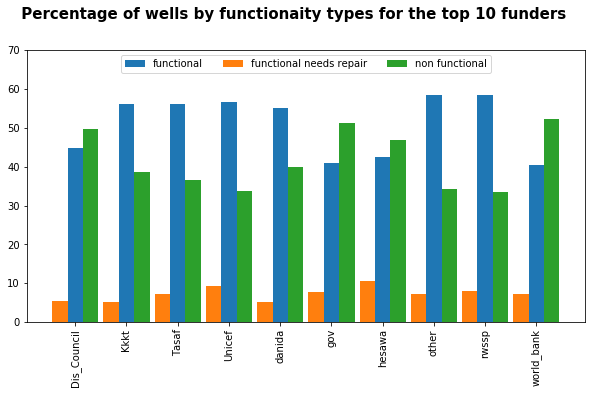

In [82]:
funder = [0,1,2,3,4,5,6,7,8,9]
functional = per_df['functional']
nr_functional = per_df['functional needs repair']
n_functional = per_df['non functional']
header = per_df.columns.values #an array of columns headers

fig = plt.figure()
ax = plt.subplot()

#Grouped bar chart
ind = np.arange(len(funder)) #no of x ticks;
width = 0.3 #width of the bar


#ax.bar(position of the bar wrt the x-ticks, data, width of bar, label)
ax.bar(ind , functional, width,label='functional')
ax.bar(ind- width , nr_functional, width,label='functional needs repair')
ax.bar(ind + width , n_functional, width,label='non functional')
ax.legend(loc=9,ncol=3)

ax.set_xticks([0,1,2,3,4,5,6,7,8,9])
ax.set_ylim(0,70)
#create a list of  variable names to use as labels for ticks in hor axis
xlab=[item.get_text() for item in ax.get_xticklabels()] # list with empty strings. list length determined my the ticks seen in the plots
# replace empty strings at even list indexes by variable names in the same order as they are present in the dataframe column names
xlab[0]='Dis_Council'
xlab[1]='Kkkt'
xlab[2]='Tasaf'
xlab[3]='Unicef'
xlab[4]='danida'
xlab[5]='gov'
xlab[6] ='hesawa'
xlab[7]='other'
xlab[8]='rwssp'
xlab[9] ='world_bank'


#set the vertical axis tick labels using the list created above
ax.set_xticklabels(xlab)

#for i,v in enumerate(functional):
    #.text(i-.25,v+10,functional[i],fomtsize=8)


for tick in ax.get_xticklabels():
    tick.set_rotation(90)

#Set the figure size so that all four panel graphs are clearly visible
fig.set_size_inches(10,5)   
#Set a title for the figure
fig.suptitle(' Percentage of wells by functionaity types for the top 10 funders  '\
             ,y=1,fontsize=15,fontweight='bold')
plt.show()

In [83]:
# There are some clear differences here that will hopefully improve the model. The next feature
# to inspect is 'installer'.

train_data.installer.value_counts()

DWE                            17402
Government                      1825
RWE                             1206
Commu                           1060
DANIDA                          1050
KKKT                             898
Hesawa                           840
0                                777
TCRS                             707
Central government               622
CES                              610
Community                        553
DANID                            552
District Council                 551
HESAWA                           539
LGA                              408
World vision                     408
WEDECO                           397
TASAF                            396
District council                 392
Gover                            383
AMREF                            329
TWESA                            316
WU                               301
Dmdd                             287
ACRA                             278
World Vision                     270
S

In [84]:
# Create a function to reduce the amount of dummy columns needed whilst maintaining the 
# information contained in the column.

def installer_wrangler(row):
    '''Keep top 7 values and set the rest to 'other'''
    if row['installer']=='DWE':
        return 'dwe'
    elif row['installer']=='Government':
        return 'gov'
    elif row['installer']=='RWE':
        return 'rwe'
    elif row['installer']=='Commu':
        return 'commu'
    elif row['installer']=='DANIDA':
        return 'danida'
    elif row['installer']=='KKKT ':
        return 'KKKT '
    elif row['installer']=='Hesawa':
        return 'Hesawa'
    
    else:
        return 'other'  

train_data['installer'] = train_data.apply(lambda row: installer_wrangler(row), axis=1)

In [85]:
per_inst = train_data.groupby(['installer','status_group'])['status_group_vals']\
                                                .count() \
                                                .unstack() \
                                                .reset_index() \
                                                 .fillna(0) \
                                            .set_index('installer')
per_inst.head(7)

status_group,functional,functional needs repair,non functional
installer,,,
Hesawa,475,17,348
commu,724,32,304
danida,542,83,425
dwe,9433,1622,6347
gov,535,256,1034
other,20246,2170,13601
rwe,304,137,765


In [86]:
per_inst['total'] = per_inst.sum(axis=1)

per_inst

status_group,functional,functional needs repair,non functional,total
installer,,,,
Hesawa,475,17,348,840
commu,724,32,304,1060
danida,542,83,425,1050
dwe,9433,1622,6347,17402
gov,535,256,1034,1825
other,20246,2170,13601,36017
rwe,304,137,765,1206


In [87]:
perinst_df = percentage_share(per_inst) 

perinst_df

status_group,functional,functional needs repair,non functional
installer,,,
Hesawa,56.547619,2.023810,41.428571
commu,68.301887,3.018868,28.679245
danida,51.619048,7.904762,40.476190
dwe,54.206413,9.320768,36.472819
gov,29.315068,14.027397,56.657534
other,56.212344,6.024933,37.762723
rwe,25.207297,11.359867,63.432836


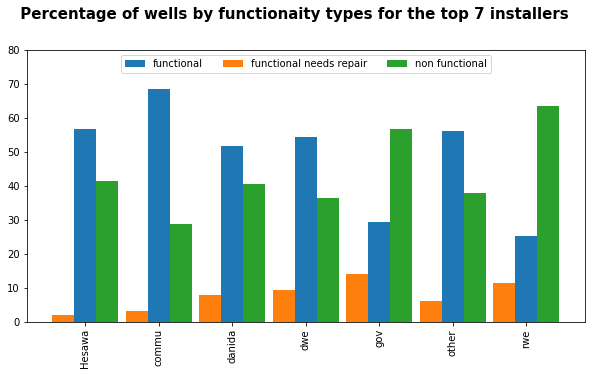

In [88]:
installer = [0,1,2,3,4,5,6]
functional = perinst_df['functional']
nr_functional = perinst_df['functional needs repair']
n_functional = perinst_df['non functional']
header = perinst_df.columns.values #an array of columns headers

fig = plt.figure()
ax = plt.subplot()

#Grouped bar chart
ind = np.arange(len(installer)) #no of x ticks;
width = 0.3 #width of the bar


#ax.bar(position of the bar wrt the x-ticks, data, width of bar, label)
ax.bar(ind , functional, width,label='functional')
ax.bar(ind- width , nr_functional, width,label='functional needs repair')
ax.bar(ind + width , n_functional, width,label='non functional')
ax.legend(loc=9,ncol=3)

ax.set_xticks([0,1,2,3,4,5,6])
ax.set_ylim(0,80)
#create a list of  variable names to use as labels for ticks in hor axis
xlab=[item.get_text() for item in ax.get_xticklabels()] # list with empty strings. list length determined my the ticks seen in the plots
# replace empty strings at even list indexes by variable names in the same order as they are present in the dataframe column names
xlab[0]='Hesawa'
xlab[1]='commu'
xlab[2]='danida'
xlab[3]='dwe'
xlab[4]='gov'
xlab[5]='other'
xlab[6] ='rwe'



#set the vertical axis tick labels using the list created above
ax.set_xticklabels(xlab)

#for i,v in enumerate(functional):
    #.text(i-.25,v+10,functional[i],fomtsize=8)


for tick in ax.get_xticklabels():
    tick.set_rotation(90)

#Set the figure size so that all four panel graphs are clearly visible
fig.set_size_inches(10,5)   
#Set a title for the figure
fig.suptitle(' Percentage of wells by functionaity types for the top 7 installers  '\
             ,y=1,fontsize=15,fontweight='bold')
plt.show()

In [89]:
# As was the case with 'funder' there are some clear differences here that will hopefully
# improve the model. The next feature to inspect is 'subvillage'.

print(train_data.subvillage.value_counts())

Madukani        508
Shuleni         506
Majengo         502
Kati            373
Mtakuja         262
Sokoni          232
M               187
Muungano        172
Mbuyuni         164
Mlimani         152
Songambele      147
Msikitini       134
Miembeni        134
1               132
Kibaoni         114
Kanisani        111
Mapinduzi       109
I               109
Mjini           108
Mjimwema        108
Mkwajuni        104
Mwenge          102
Mabatini         98
Azimio           98
Mission          95
Mbugani          95
Bwawani          91
Bondeni          90
Chang'Ombe       88
Zahanati         86
               ... 
Kamguruki         1
Mwadegeleki       1
Kwamnyaliva       1
Saayo             1
Nyamswa           1
San`Gans          1
Bulima A          1
Litumba           1
Chafimbo          1
Murutunguru       1
Miziru            1
Talamagangs       1
Molangi           1
Ndayanjoju        1
Mwafalu           1
Soliwaye          1
Nyamitondo        1
Mchedebwa         1
Jeremanga B       1


In [90]:
print('Number of villages: ', len(train_data.subvillage.value_counts()))

Number of villages:  19287


In [91]:
# 19287 unique values! The largest values don't dominate as was the case with installer and
# funder. It's probably not worth creating dummy variables for the top 5. I'll drop this one but
# feel free to experiment here.

train_data.drop('subvillage',inplace = True, axis=1)

In [92]:
# Let's investigate the next column containg null data: 'public_meeting'.

train_data.public_meeting.value_counts()

True     51011
False     5055
Name: public_meeting, dtype: int64

In [93]:
# We only have two values here: true and false. This one can stay but we'll have to replace 
# the unknown data with a string value.

train_data.public_meeting = train_data.public_meeting.fillna('Unknown')

In [94]:
train_data.public_meeting

0           True
1        Unknown
2           True
3           True
4           True
5           True
6           True
7           True
8           True
9           True
10          True
11          True
12          True
13          True
14          True
15          True
16          True
17          True
18       Unknown
19          True
20          True
21       Unknown
22          True
23          True
24         False
25          True
26         False
27          True
28          True
29          True
          ...   
59370       True
59371       True
59372       True
59373       True
59374       True
59375       True
59376       True
59377       True
59378       True
59379       True
59380       True
59381       True
59382       True
59383       True
59384       True
59385       True
59386       True
59387    Unknown
59388       True
59389      False
59390       True
59391       True
59392       True
59393      False
59394       True
59395       True
59396       True
59397       Tr

In [95]:
# 'scheme_management' is up next.
#train_data.apply(lambda x: sum(x.isnull()))

#train_data.scheme_management.apply(lambda x:sum(x.isnull()))
#train_data.scheme_management.isnull()
#train_data.scheme_management.isnull().sum().sum()
train_data.scheme_management.value_counts()
#train_data.scheme_management

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [96]:
# Create a function to reduce the amount of dummy columns needed whilst maintaining the 
# information contained in the column.

def scheme_wrangler(row):
    '''Keep top 8 values and set the rest to 'other'. '''
    if row['scheme_management']=='VWC':
        return 'vwc'
    elif row['scheme_management']=='WUG':
        return 'wug'
    elif row['scheme_management']=='Water authority':
        return 'wtr_auth'
    elif row['scheme_management']=='WUA':
        return 'wua'
    elif row['scheme_management']=='Water Board':
        return 'wtr_brd'
    elif row['scheme_management']=='Parastatal':
        return 'Parastatal'
    elif row['scheme_management']=='Private operator':
        return 'pri_opr'
    elif row['scheme_management']=='Company':
        return 'comp'
    else:
        return 'other'

train_data['scheme_management'] = train_data.apply(lambda row: scheme_wrangler(row), axis=1)

In [97]:
per_sch_mgmt = train_data.groupby(['scheme_management','status_group'])['status_group_vals']\
                                                .count() \
                                                .unstack() \
                                                .reset_index() \
                                                 .fillna(0) \
                                            .set_index('scheme_management')
per_sch_mgmt.head(8)

status_group,functional,functional needs repair,non functional
scheme_management,,,
Parastatal,966,202,512
comp,534,37,490
other,2398,251,2164
pri_opr,729,23,311
vwc,18960,2334,15499
wtr_auth,1618,448,1087
wtr_brd,2053,111,584
wua,1995,239,649


In [98]:
per_sch_mgmt['total'] = per_sch_mgmt.sum(axis=1)

per_sch_mgmt

status_group,functional,functional needs repair,non functional,total
scheme_management,,,,
Parastatal,966,202,512,1680
comp,534,37,490,1061
other,2398,251,2164,4813
pri_opr,729,23,311,1063
vwc,18960,2334,15499,36793
wtr_auth,1618,448,1087,3153
wtr_brd,2053,111,584,2748
wua,1995,239,649,2883
wug,3006,672,1528,5206


In [99]:
#calculating the percentage
per_sch_mgmt_df = percentage_share(per_sch_mgmt) 

per_sch_mgmt_df

status_group,functional,functional needs repair,non functional
scheme_management,,,
Parastatal,57.500000,12.023810,30.476190
comp,50.329877,3.487276,46.182846
other,49.823395,5.215043,44.961562
pri_opr,68.579492,2.163688,29.256820
vwc,51.531541,6.343598,42.124861
wtr_auth,51.316207,14.208690,34.475103
wtr_brd,74.708879,4.039301,21.251820
wua,69.198751,8.289976,22.511273
wug,57.741068,12.908183,29.350749


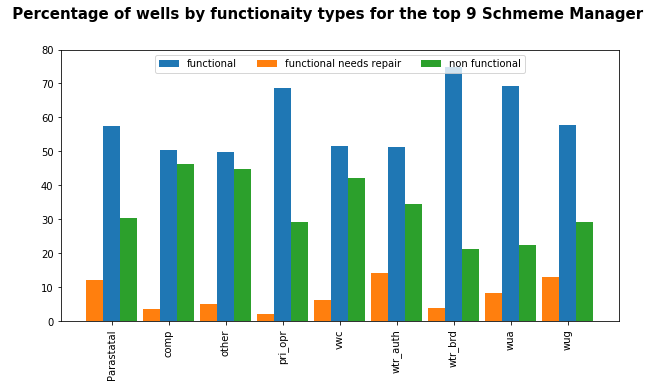

In [100]:
scheme_management = [0,1,2,3,4,5,6,7,8]
functional = per_sch_mgmt_df['functional']
nr_functional = per_sch_mgmt_df['functional needs repair']
n_functional = per_sch_mgmt_df['non functional']
header = per_sch_mgmt_df.columns.values #an array of columns headers

fig = plt.figure()
ax = plt.subplot()

#Grouped bar chart
ind = np.arange(len(scheme_management)) #no of x ticks;
width = 0.3 #width of the bar


#ax.bar(position of the bar wrt the x-ticks, data, width of bar, label)
ax.bar(ind , functional, width,label='functional')
ax.bar(ind- width , nr_functional, width,label='functional needs repair')
ax.bar(ind + width , n_functional, width,label='non functional')
ax.legend(loc=9,ncol=3)

ax.set_xticks([0,1,2,3,4,5,6,7,8])
ax.set_ylim(0,80)
#create a list of  variable names to use as labels for ticks in hor axis
xlab=[item.get_text() for item in ax.get_xticklabels()] # list with empty strings. list length determined my the ticks seen in the plots
# replace empty strings at even list indexes by variable names in the same order as they are present in the dataframe column names
xlab[0]='Parastatal'
xlab[1]='comp'
xlab[2]='other'
xlab[3]='pri_opr'
xlab[4]='vwc'
xlab[5]='wtr_auth'
xlab[6] ='wtr_brd'
xlab[7] ='wua'
xlab[8] ='wug'



#set the vertical axis tick labels using the list created above
ax.set_xticklabels(xlab)

#for i,v in enumerate(functional):
    #.text(i-.25,v+10,functional[i],fomtsize=8)


for tick in ax.get_xticklabels():
    tick.set_rotation(90)

#Set the figure size so that all four panel graphs are clearly visible
fig.set_size_inches(10,5)   
#Set a title for the figure
fig.suptitle(' Percentage of wells by functionaity types for the top 9 Schmeme Manager  '\
             ,y=1,fontsize=15,fontweight='bold')
plt.show()

In [101]:
train_data.scheme_name.value_counts()

K                                        682
None                                     644
Borehole                                 546
Chalinze wate                            405
M                                        400
DANIDA                                   379
Government                               320
Ngana water supplied scheme              270
wanging'ombe water supply s              261
wanging'ombe supply scheme               234
Bagamoyo wate                            229
I                                        229
Uroki-Bomang'ombe water sup              209
N                                        204
Kirua kahe gravity water supply trust    193
Machumba estate pipe line                185
Makwale water supplied sche              166
Kijiji                                   161
S                                        154
Handeni Trunk Main(H                     152
mtwango water supply scheme              152
Losaa-Kia water supply                   152
Mkongoro T

In [102]:
len(train_data.scheme_name.unique())

2697

In [103]:
# Lots of factors and the top 5 or so only represent a fraction of the total values. Probably 
# safe to drop this column.

train_data.drop('scheme_name',inplace = True , axis=1)

In [104]:
# The final column containing nulls is 'permit'.

train_data.permit.value_counts()

True     38852
False    17492
Name: permit, dtype: int64

In [105]:
# We only have two values here: true and false. This one can stay but we'll have to replace 
# the unknown data with a string value.

train_data.permit = train_data.permit.fillna('Unknown')

In [106]:

train_data.apply(lambda x: sum(x.isnull()))

id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
source_class             0
waterpoint_type          0
w

In [107]:
# Excellent! Now there are no nulls in the data set. We can move on to look at columns with 
# string values and modify or remove them as we see fit.

str_cols = train_data.select_dtypes(include = ['object'])
str_cols.apply(lambda x: len(x.unique()))

date_recorded              356
funder                      10
installer                    7
wpt_name                 37400
basin                        9
region                      21
lga                        125
ward                      2092
public_meeting               3
recorded_by                  1
scheme_management            9
permit                       3
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_group                6
quantity                     5
quantity_group               5
source                      10
source_type                  7
source_class                 3
waterpoint_type              7
waterpoint_type_group        6
status_group                 3
dtype: int64

In [108]:
# 'Date recorded'

train_data.date_recorded.describe()

count          59400
unique           356
top       2011-03-15
freq             572
Name: date_recorded, dtype: object

In [109]:
# Let's first convert the column to type datetime. Then change the column to represent the 
# number of days since the most recently recorded datum we have. The idea being that more 
# recently recorded pumps might be more likely to be functional than non-functional. 

train_data.date_recorded = pd.to_datetime(train_data.date_recorded)
train_data.date_recorded.describe()

count                   59400
unique                    356
top       2011-03-15 00:00:00
freq                      572
first     2002-10-14 00:00:00
last      2013-12-03 00:00:00
Name: date_recorded, dtype: object

In [110]:
# The most recent data is 2013-12-03. Subtract each date from this point to obtain a 
# 'days_since_recorded' column.

train_data.date_recorded = pd.datetime(2013, 12, 3) - pd.to_datetime(train_data.date_recorded)
train_data.columns = ['days_since_recorded' if x=='date_recorded' else x for x in train_data.columns]
train_data.days_since_recorded = train_data.days_since_recorded.astype('timedelta64[D]').astype(int)
train_data.days_since_recorded.describe()

count    59400.000000
mean       613.616970
std        334.216374
min          0.000000
25%        297.000000
50%        419.000000
75%        977.000000
max       4068.000000
Name: days_since_recorded, dtype: float64

In [111]:
# There's a wide range of data here hopefully it will help improve the predictive power of our
# models. Next up for inspection is 'wpt_name' (Name of the waterpoint if there is one).

train_data.wpt_name.value_counts()

none                     3563
Shuleni                  1748
Zahanati                  830
Msikitini                 535
Kanisani                  323
Bombani                   271
Sokoni                    260
Ofisini                   254
School                    208
Shule Ya Msingi           199
Shule                     152
Sekondari                 146
Muungano                  133
Mkombozi                  111
Madukani                  104
Hospital                   94
Mbugani                    94
Upendo                     93
Kituo Cha Afya             90
Mkuyuni                    88
Umoja                      84
Center                     83
Ccm                        81
Kisimani                   78
Mtakuja                    76
Ofisi Ya Kijiji            76
Tankini                    73
Songambele                 66
Bwawani                    66
Maendeleo                  64
                         ... 
Kwa Mwacha                  1
Nchenjere                   1
Mulandege 

In [112]:
# Due to the huge number of factors and the lack of a clear dominating value I'll drop this.
# I may come back and include the top 5 later. Next up is 'basin'.

train_data.drop('wpt_name',inplace = True , axis=1)

In [113]:
train_data.basin.value_counts()

Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64

In [114]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 39 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
days_since_recorded      59400 non-null int32
funder                   59400 non-null object
gps_height               59400 non-null int64
installer                59400 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
num_private              59400 non-null int64
basin                    59400 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           59400 non-null object
recorded_by              59400 non-null object
scheme_management        59400 non-null object
pe

In [115]:
piv_table = pd.pivot_table(train_data, index=['basin', 'status_group'],
                           values=['status_group_vals'], aggfunc='count')
piv_table

status_group_vals
basin                   status_group                              
Internal                functional                            4482
                        functional needs repair                557
                        non functional                        2746
Lake Nyasa              functional                            3324
                        functional needs repair                250
                        non functional                        1511
Lake Rukwa              functional                            1000
                        functional needs repair                270
                        non functional                        1184
Lake Tanganyika         functional                            3107
                        functional needs repair                742
                        non functional                        2583
Lake Victoria           functional                            5100
                        functional needs repair                989
                        non functional                        4159
Pangani                 functional                            5372
                        functional needs repair                477
                        non functional                        3091
Rufiji                  functional                            5068
                        functional needs repair                437
                        non functional                        2471
Ruvuma / Southern Coast functional                            1670
                        functional needs repair                326
                        non functional                        2497
Wami / Ruvu             functional                            3136
                        functional needs repair                269
                        non functional                        2582

In [60]:
# Most basins have have more functional than non-functional pumps. Lake Rukwa
# and Ruvuma don't. All the values are over 2000 so this looks like a good feature to keep.
# Region will be considered next.

In [116]:

train_data.region.value_counts()

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

In [117]:
# Both basin, lga, ward and region contain geographical information so there is a risk of them being
# highly correlated with each other. I'll drop then for now.
# They could be be worth including though, so I may come back to them.
train_data.drop(['region', 'lga', 'ward'],inplace = True, axis=1)

In [118]:
train_data.recorded_by.value_counts().describe()

count        1.0
mean     59400.0
std          NaN
min      59400.0
25%      59400.0
50%      59400.0
75%      59400.0
max      59400.0
Name: recorded_by, dtype: float64

In [119]:
# All data points have the same value so this offers no information that would help build our
# model.
train_data.drop('recorded_by',inplace = True, axis=1)

In [120]:
# extraction_type, extraction_type_group and extraction_type_class appear to contain very similar
# data. I'll drop the first two and keep the last one.

train_data.drop(['extraction_type', 'extraction_type_group'],inplace = True, axis=1)

In [121]:
train_data.management.value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [122]:
# This appears to be almost identical to 'scheme_management'. I'll drop it.

train_data.drop('management',inplace = True, axis=1)

In [123]:
train_data.management_group.value_counts()

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

In [124]:
train_data.scheme_management.unique()

array(['vwc', 'other', 'pri_opr', 'wug', 'wtr_brd', 'wua', 'wtr_auth',
       'comp', 'Parastatal'], dtype=object)

In [125]:
# Appears to offer no new info and is likely to overlap with 'scheme_management'.

train_data.drop('management_group',inplace = True, axis=1)

In [126]:
train_data.payment.value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [127]:
train_data.payment_type.value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

In [128]:
# Payment and payment_type contain identical data. Remove one and keep the other.

train_data.drop('payment',inplace = True, axis=1)

In [129]:

train_data.water_quality.value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [130]:
train_data.quality_group.value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

In [131]:
# Water_quality and quality_group contain identical data. Remove one and keep the other.

train_data.drop('quality_group',inplace = True, axis = 1)

In [132]:
train_data.quantity.value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [133]:
train_data.quantity_group.value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

In [134]:
# Quantity and quantity_group contain identical data. Remove one and keep the other.

train_data.drop('quantity_group',inplace = True,axis = 1)

In [135]:
train_data.source.value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [136]:
train_data.source_class.value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

In [137]:
train_data.source_type.value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [138]:
# Source and source_type contain very similar information. Remove one and keep the other.

train_data.drop('source',inplace = True,axis =  1)

In [139]:
# gps_height, longitude, latitude, region_code and district_code are all geographic info which
# is unlikely to add any predictive power to the model given that there are other variables
# containing geographic data. 'num_private' hasn't been given a discription on Driven Data,
# it appears to be superflous. We expect id to not contain any useful information so that gets
# dropped too.

train_data.drop(['gps_height', 'longitude', 'latitude', 'region_code', 'district_code',
             'num_private', 'id'], inplace = True,axis=1)